In [1]:
import numpy as np
import pandas as pd

In [2]:
##import tensorflow as tf
##tf.logging.set_verbosity(tf.logging.ERROR)

import keras as ks
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
## Read in the entire data set just for eyeballing.
pd_data = pd.read_csv('K_data.csv', header=None)
np_data = np.array(pd_data.values, dtype=np.float32) ## float32 might be better if using a GPU
pd_data

,0,1,2,3,4,5
0,1.729100e-03,1.509,0.52360,3,2,0.0100
1,1.965300e-03,1.558,0.54105,3,2,0.0100
2,2.224300e-03,1.607,0.55851,3,2,0.0100
3,2.507300e-03,1.656,0.57596,3,2,0.0100
4,2.815600e-03,1.705,0.59341,3,2,0.0100
5,3.150700e-03,1.753,0.61087,3,2,0.0100
6,3.513700e-03,1.802,0.62832,3,2,0.0100
7,3.906100e-03,1.850,0.64577,3,2,0.0100
8,4.329200e-03,1.898,0.66323,3,2,0.0100
9,4.784300e-03,1.946,0.68068,3,2,0.0100


In [4]:
## Read in the training data, which includes both the input features and the outputs K.
pd_train = pd.read_csv('K_training_random_stand.csv', header=None)
np_train = np.array(pd_train.values, dtype=np.float32) ## float32 might be better if using a GPU
np_train

array([[2.6582001e-04, 9.4499999e-01, 9.3334609e-01, ..., 1.0000000e+00,
        1.0000000e+00, 2.0000000e-01],
       [6.9525000e-03, 2.1370001e+00, 2.1666348e-01, ..., 0.0000000e+00,
        1.0000000e+00, 5.0000000e-01],
       [5.4947002e-12, 1.1000000e-02, 0.0000000e+00, ..., 1.0000000e+00,
        9.0909094e-02, 6.0000002e-01],
       ...,
       [1.3298000e-10, 2.5000000e-02, 6.6663486e-01, ..., 1.0000000e+00,
        9.0909094e-02, 9.9179999e+02],
       [2.5088999e-16, 1.0000000e-03, 9.1663486e-01, ..., 1.0000000e+00,
        0.0000000e+00, 9.9600000e+02],
       [1.9636000e-06, 2.7700001e-01, 3.6666349e-01, ..., 0.0000000e+00,
        0.0000000e+00, 9.9640002e+02]], dtype=float32)

In [5]:
## Extract the input features: theta, m, n, h_star
features = np_train[:, 2:6]
features

array([[0.9333461 , 1.        , 1.        , 1.        ],
       [0.21666348, 0.        , 0.        , 1.        ],
       [0.        , 1.        , 1.        , 0.09090909],
       ...,
       [0.66663486, 1.        , 1.        , 0.09090909],
       [0.91663486, 1.        , 1.        , 0.        ],
       [0.3666635 , 0.        , 0.        , 0.        ]], dtype=float32)

In [6]:
## Extract the correct outputs K
correct_outputs = np_train[:, 1]
correct_outputs[1:5]

array([2.137, 0.011, 0.03 , 0.022], dtype=float32)

In [7]:
## Read in the test data, which includes both the input features and the outputs K.
pd_test = pd.read_csv('K_testing_stand.csv', header=None)
np_test = pd_test.values
num_tests = len(np_test)

In [8]:
##  Define a model.
layer_0 = ks.layers.Dense(units=50, input_shape=[4])
layer_1 = ks.layers.Dense(units=30)
layer_2 = ks.layers.Dense(units=1)
model_0 = ks.Sequential([layer_0, layer_1, layer_2])
model_0.summary()

W0809 12:14:23.388339 140234963097408 deprecation_wrapper.py:119] From /home/earl/Desktop/jupyenv-py3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0809 12:14:23.406507 140234963097408 deprecation_wrapper.py:119] From /home/earl/Desktop/jupyenv-py3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0809 12:14:23.410512 140234963097408 deprecation_wrapper.py:119] From /home/earl/Desktop/jupyenv-py3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                250       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 1,811
Trainable params: 1,811
Non-trainable params: 0
_________________________________________________________________


In [9]:
model_0.compile(loss='mean_squared_error',
              optimizer=ks.optimizers.Adam(0.1))

W0809 12:14:23.485400 140234963097408 deprecation_wrapper.py:119] From /home/earl/Desktop/jupyenv-py3/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [10]:
history_0 = model_0.fit(features, correct_outputs, epochs=250, verbose=True)
print("Finished training the model")

W0809 12:14:23.585366 140234963097408 deprecation_wrapper.py:119] From /home/earl/Desktop/jupyenv-py3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0809 12:14:23.645560 140234963097408 deprecation_wrapper.py:119] From /home/earl/Desktop/jupyenv-py3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/250
538/538 [==============================] - 0s 559us/step - loss: 16.0830
Epoch 2/250
538/538 [==============================] - 0s 19us/step - loss: 1.6118
Epoch 3/250
538/538 [==============================] - 0s 21us/step - loss: 0.3091
Epoch 4/250
538/538 [==============================] - 0s 22us/step - loss: 0.2202
Epoch 5/250
538/538 [==============================] - 0s 20us/step - loss: 0.2041
Epoch 6/250
538/538 [==============================] - 0s 22us/step - loss: 0.2793
Epoch 7/250
538/538 [==============================] - 0s 21us/step - loss: 0.2302
Epoch 8/250
538/538 [==============================] - 0s 22us/step - loss: 0.1940
Epoch 9/250
538/538 [==============================] - 0s 21us/step - loss: 0.1994
Epoch 10/250
538/538 [==============================] - 0s 22us/step - loss: 0.1979
Epoch 11/250
538/538 [==============================] - 0s 20us/step - loss: 0.1929
Epoch 12/250
538/538 [==============================] - 0s 20us/step - loss: 0.1902

538/538 [==============================] - 0s 19us/step - loss: 0.1906
Epoch 99/250
538/538 [==============================] - 0s 20us/step - loss: 0.1935
Epoch 100/250
538/538 [==============================] - 0s 18us/step - loss: 0.1884
Epoch 101/250
538/538 [==============================] - 0s 19us/step - loss: 0.1870
Epoch 102/250
538/538 [==============================] - 0s 19us/step - loss: 0.1876
Epoch 103/250
538/538 [==============================] - 0s 20us/step - loss: 0.1983
Epoch 104/250
538/538 [==============================] - 0s 18us/step - loss: 0.2098
Epoch 105/250
538/538 [==============================] - 0s 20us/step - loss: 0.1978
Epoch 106/250
538/538 [==============================] - 0s 18us/step - loss: 0.1904
Epoch 107/250
538/538 [==============================] - 0s 19us/step - loss: 0.1920
Epoch 108/250
538/538 [==============================] - 0s 19us/step - loss: 0.1964
Epoch 109/250
538/538 [==============================] - 0s 18us/step - loss: 0.

538/538 [==============================] - 0s 20us/step - loss: 0.2003
Epoch 195/250
538/538 [==============================] - 0s 20us/step - loss: 0.2045
Epoch 196/250
538/538 [==============================] - 0s 19us/step - loss: 0.2234
Epoch 197/250
538/538 [==============================] - 0s 18us/step - loss: 0.2010
Epoch 198/250
538/538 [==============================] - 0s 21us/step - loss: 0.2192
Epoch 199/250
538/538 [==============================] - 0s 21us/step - loss: 0.2433
Epoch 200/250
538/538 [==============================] - 0s 19us/step - loss: 0.2180
Epoch 201/250
538/538 [==============================] - 0s 22us/step - loss: 0.2218
Epoch 202/250
538/538 [==============================] - 0s 19us/step - loss: 0.1921
Epoch 203/250
538/538 [==============================] - 0s 19us/step - loss: 0.1969
Epoch 204/250
538/538 [==============================] - 0s 19us/step - loss: 0.2177
Epoch 205/250
538/538 [==============================] - 0s 19us/step - loss: 0

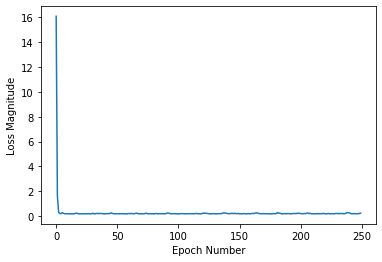

In [11]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history_0.history['loss'])

In [12]:
## Run the test examples through the model.
cum_errors = cum_outputs = 0
predictions = []
for i in range(num_tests):
    test = np_test[i, 2:6]
    predict = model_0.predict(np.array([test]))
    out = np_test[i, 1]
    predictions.append(predict[0][0])
    
    print("Prediction: {}, Expected: {}".format(predict[0][0], out))
    cum_errors += abs(predict - out)
    cum_outputs += abs(out)
    
cum_errors = cum_errors[0][0]  ## Extract out the single real number.
print('')
print('Mean error on test set: {}'.format(cum_errors / num_tests))
print('Mean error % on test set: {}'.format(cum_errors / cum_outputs * 100))

Prediction: 1.9485347270965576, Expected: 1.5090000000000001
Prediction: 1.5565433502197266, Expected: 1.915
Prediction: 1.2071444988250732, Expected: 0.9540000000000001
Prediction: 0.4671202003955841, Expected: 0.547
Prediction: 0.0846148133277893, Expected: 0.214
Prediction: -0.26478415727615356, Expected: 0.031
Prediction: 0.3265496492385864, Expected: 0.179
Prediction: -0.05598348379135132, Expected: 0.022000000000000002
Prediction: -0.452674925327301, Expected: 0.001
Prediction: 2.450206756591797, Expected: 3.864
Prediction: 2.317711353302002, Expected: 3.303

Mean error on test set: 0.4213158867575906
Mean error % on test set: 36.96048133290929


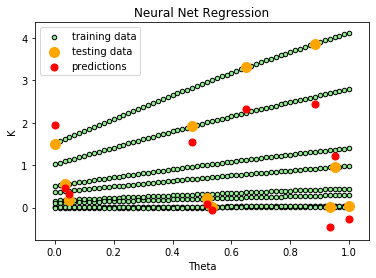

In [15]:
# Plot the results, but only use Theta for the input since we only want a two-dimensional graph with a 
# single value for input and a single value for output. In actuality, there are four input values.

theta_train = np_train[:, 2]  ## The third column in the data is Theta
theta_test = np_test[:, 2]
test_values = np_test[:, 1]

plt.figure()
plt.scatter(theta_train, correct_outputs, s=20, edgecolor="black",
            c="lightgreen", label="training data")
plt.scatter(theta_test, test_values, s=100, color="orange", label="testing data")
plt.scatter(theta_test, predictions, s=50, color="red", label="predictions")
plt.xlabel("Theta")
plt.ylabel("K")
plt.title("Neural Net Regression")
plt.legend()
plt.show()